# Final Project Submission

Please fill out:
* Student name: <strong>Michael Mahoney</strong>
* Student pace: self paced / <strong>part time</strong> / full time
* Scheduled project review date/time: 
* Instructor name: <strong>James Irving</strong>
* Blog post URL:


# Project Overview
## Scpoe
The purpose of this project is to explore the King County Housing data to discover what variables are the best predictors of sale price. The following elements will be considered to be the primary scope of the project.

###  Question 1: Is it worth it to expand a house?
###  Question 2: If I have space to add an additional room, what should I put in the space?
###  Question 3: I'm looking to buy a house in King County. I like a lot of space and don't really care about the neighborhood. What area should I look in to get the most space for my money if I can only spend 400,000 dollars.
###  Question 4: My house is styled from back in the seventies. I'm trying to sell it and want to know if it's worth upgrading.

## Methodology: CRISP-DM
* Investigating the existing data
* Cleaning data by discarding or replacing null and/or filler data
* Analysis of the independant variables
* Preforming a linear regression analysis of the data and revising as needed

# Package Dependancies
* Numpy
* Pandas
* Matplotlib.pyplot
* scipy.stats
* Seaborn
* statsmodels
* scikit-learn
* datetime
* math
* customModule

# Baseline Data-Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
import datetime
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

import customModule # As the name suggests, this is a custom module that can be found on the top level of this repo


In [2]:
# Toggle the following line to show all columns
pd.set_option('display.max_columns', None)

## First Look

In [3]:
# Import the data set for pre-processing and save it to a variable
dfInitial = pd.DataFrame(pd.read_csv('kc_house_data.csv'))

#show some initial summary info
print(f'The DataFrame is of dimensions {dfInitial.shape} \n')
display(dfInitial.head())
display(dfInitial.describe())
display(dfInitial.info());


The DataFrame is of dimensions (21597, 21) 



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

From our info list we see that many of the data types have been imput incorrectly. We will now go through reassign the correct data types for use in the regression model.

## Changing Column Data Types

### Date-times

The date column appears to be the only datetime column. It is currectly assigned to dtype 'object' which is the string type in pandas. In order to get more information out of the data in the date column, we are going to seperate the date information into the three distinct columns: year, month and day of the week. Otherwise much of the information stored in the dates would be lost in a continuous numerical approach.  

In [4]:
# Use the datetime module to create the new columns
dfInitial['day'] = pd.to_datetime(dfInitial['date']).dt.day_name()
dfInitial['month'] = pd.DatetimeIndex(pd.to_datetime(dfInitial['date'])).month
dfInitial['year'] = pd.DatetimeIndex(pd.to_datetime(dfInitial['date'])).year
dfInitial['date']

# We drop the original date column which has been parted out into multiple pieces
dfInitial.drop(columns = 'date', inplace = True)

### Numerical

There also only appear to be one mis-typed numerical column, being 'sqft_basement'. Because the column has null values encoded as the question mark symbol '?', we will replace this with the none type and address this later.

In [5]:
# Divest the dataframe of the ? symbol in order to convert the column to a numeric type
dfInitial['sqft_basement'].loc[dfInitial['sqft_basement'] == '?'] = None
dfInitial['sqft_basement'].isna().sum()
dfInitial['sqft_basement'] = pd.to_numeric(dfInitial['sqft_basement'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### Categorical

We now look to re-assign to categories. When looking at our columns, there are several instances of categories being coded as numerical columns. From the descrtiption of our columns as provided in the repository the following columns are better encoded as categories: 'waterfront', 'zipcode', 'day', 'month. Pandas has a specific dtype called 'category' for this type of encoding.

In [6]:
# We are going to do something special to the 'yr_renovated' column to change its type to  first
dfInitial['yr_renovated'] = dfInitial['yr_renovated'].apply(lambda x: int(x) if x == None else x)

# dfInitial['yr_renovated'] = dfInitial['yr_renovated'].astype('object')
dfInitial['view'] = dfInitial['view'].apply(lambda x: int(x) if x == None else x)
dfInitial['view'] = dfInitial['view'].astype('object')
catCols = ['waterfront', 'zipcode', 'day', 'month']
dfInitial[catCols] = dfInitial[catCols].astype('category')

# A final check to make sure that everything took. 
dfInitial.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             21597 non-null  int64   
 1   price          21597 non-null  float64 
 2   bedrooms       21597 non-null  int64   
 3   bathrooms      21597 non-null  float64 
 4   sqft_living    21597 non-null  int64   
 5   sqft_lot       21597 non-null  int64   
 6   floors         21597 non-null  float64 
 7   waterfront     19221 non-null  category
 8   view           21534 non-null  object  
 9   condition      21597 non-null  int64   
 10  grade          21597 non-null  int64   
 11  sqft_above     21597 non-null  int64   
 12  sqft_basement  21143 non-null  float64 
 13  yr_built       21597 non-null  int64   
 14  yr_renovated   17755 non-null  float64 
 15  zipcode        21597 non-null  category
 16  lat            21597 non-null  float64 
 17  long           21597 non-null  

With everything typed correctly we now move on to cleaning the data

## Detecting and Managing Null Values

### Finding placeholder values

Place holder values are entries of non-null data that are meant to serve as null data. As we've seen, there has already been one instance of place holder values in the sqft_basement column that we changed to null in order to cast the column as a new data type. We now formally go through all columns and determine the method for dealing with these values (which cannot be present for regression techniques). A common way to find these values is to map the usage of values in each column to observe a much higher frequency than other values. 

In [7]:
for x in dfInitial.columns:
    display(dfInitial[x].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

Tuesday      4710
Wednesday    4600
Monday       4097
Thursday     3989
Friday       3684
Saturday      287
Sunday        230
Name: day, dtype: int64

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

2014    14622
2015     6975
Name: year, dtype: int64

In addition to 'sqft_basement' the 'yr_renovated' column also has the placeholder value 0, which is describing an unknown date. Because this column has an overwhelming number of null values we are going to change it's type to category in order to not drop the column. 

In [8]:
dfInitial['yr_renovated'] = dfInitial['yr_renovated'].astype('category')

## Removing Outliers
We will begin with the approach of dropping all data points that lie 3-standard deviations ourside of the mean for each of the numeric columns. As for categorical, we've already observed the categorigal value counts and can conclude there are no outliers. 

This approach employed by the function dropNumericalOutliers will drop the entire row if in any given row, the number of outliers specified in the outliersPerRow parameter is reached. The function can be altered to be more stringant towards outliers. 

In [9]:
dfInitial = customModule.dropNumericOutliers(dfInitial, stdRange = 2.8, outliersPerRow = 1)
dfInitial

The input parameters caused a 4.09% drop of the total rows.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Monday,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Tuesday,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Wednesday,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Tuesday,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Wednesday,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Wednesday,5,2014
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Monday,2,2015
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Monday,6,2014
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Friday,1,2015


### Null Values

The first question to answer is whether we should drop any columns outright based on missing data. We do a quick proportionality test for the null values as follows.

In [10]:
dfInitial.isna().sum()/len(dfInitial['id'])

id               0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110221
view             0.002800
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.020905
yr_built         0.000000
yr_renovated     0.178873
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
day              0.000000
month            0.000000
year             0.000000
dtype: float64

Normally, for a column to be missing more than 10% of the data is worth considering throwing out. However, for our baseline model we will keep all columns in and decide if they warrant removal after the initial round of regression. As a further baseline measure we will fill these null values with the average for numerical data and the median for categorical data.

#### Numerical Null Values

The numerical columns with null values are 'sqft_basement'. We proceed by finding the median of the non-null data and using this value as a fill in. 

In [11]:
# nullNumeric = ['price', 'bedrooms','bathrooms','floors', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'long', 'lat', 'sqft_living15', 'sqft_lot15', 'condition', 'grade', 'yr_built', 'view', 'year']
nullNumeric = dfInitial.select_dtypes(['number'])
customModule.fillNull(dfInitial, nullNumeric, showInfo = True)        


'Column id now has 0 null values'

'The median of column id = 3971701300.0'

795000620     3
7856400300    2
2560801222    2
7129304540    2
3969300030    2
             ..
1931300035    1
2607740100    1
1922000070    1
7893808220    1
1777500160    1
Name: id, Length: 20541, dtype: int64

'Column price now has 0 null values'

'The median of column price = 442000.0'

450000.0    169
350000.0    167
550000.0    154
500000.0    150
425000.0    148
           ... 
804995.0      1
870515.0      1
336950.0      1
386100.0      1
311300.0      1
Name: price, Length: 3512, dtype: int64

'Column bedrooms now has 0 null values'

'The median of column bedrooms = 3.0'

3     9645
4     6498
2     2732
5     1418
1      192
6      191
7       24
8        7
10       2
9        2
11       1
33       1
Name: bedrooms, dtype: int64

'Column bathrooms now has 0 null values'

'The median of column bathrooms = 2.25'

2.50    5258
1.00    3830
1.75    3007
2.25    2019
2.00    1899
1.50    1435
2.75    1145
3.00     710
3.50     607
3.25     479
3.75     108
4.00      78
0.75      71
4.25      34
4.50      19
1.25       9
0.50       4
5.00       1
Name: bathrooms, dtype: int64

'Column sqft_living now has 0 null values'

'The median of column sqft_living = 1870.0'

1300    137
1400    134
1440    132
1660    129
1010    129
       ... 
2905      1
3001      1
3065      1
1048      1
1975      1
Name: sqft_living, Length: 850, dtype: int64

'Column sqft_lot now has 0 null values'

'The median of column sqft_lot = 7491.0'

5000     356
6000     284
4000     251
7200     215
4800     118
        ... 
4907       1
9005       1
35640      1
9021       1
26571      1
Name: sqft_lot, Length: 9230, dtype: int64

'Column floors now has 0 null values'

'The median of column floors = 1.0'

1.0    10477
2.0     7661
1.5     1856
3.0      588
2.5      125
3.5        6
Name: floors, dtype: int64

'Column condition now has 0 null values'

'The median of column condition = 3.0'

3    13355
4     5525
5     1642
2      165
1       26
Name: condition, dtype: int64

'Column grade now has 0 null values'

'The median of column grade = 7.0'

7     8887
8     5977
9     2493
6     2024
10     965
5      237
11     102
4       26
12       1
3        1
Name: grade, dtype: int64

'Column sqft_above now has 0 null values'

'The median of column sqft_above = 1530.0'

1300    210
1010    208
1200    206
1220    192
1140    184
       ... 
2905      1
3001      1
3065      1
1144      1
4130      1
Name: sqft_above, Length: 796, dtype: int64

'Column sqft_basement now has 0 null values'

'The median of column sqft_basement = 0.0'

0.0       12811
600.0       215
700.0       206
500.0       205
800.0       199
          ...  
1245.0        1
1990.0        1
1135.0        1
1548.0        1
506.0         1
Name: sqft_basement, Length: 256, dtype: int64

'Column yr_built now has 0 null values'

'The median of column yr_built = 1973.0'

2014    537
2005    420
2006    414
1977    401
2003    396
       ... 
1901     29
1902     26
1933     25
1935     23
1934     20
Name: yr_built, Length: 116, dtype: int64

'Column lat now has 0 null values'

'The median of column lat = 47.5714'

47.6846    17
47.5322    17
47.6711    16
47.6955    16
47.6886    16
           ..
47.2413     1
47.3570     1
47.2601     1
47.4456     1
47.2715     1
Name: lat, Length: 4974, dtype: int64

'Column long now has 0 null values'

'The median of column long = -122.238'

-122.290    111
-122.300    111
-122.362    102
-122.363     97
-122.372     96
           ... 
-121.895      1
-121.711      1
-121.891      1
-122.479      1
-121.893      1
Name: long, Length: 719, dtype: int64

'Column sqft_living15 now has 0 null values'

'The median of column sqft_living15 = 1810.0'

1540    197
1440    193
1560    189
1500    179
1580    166
       ... 
3193      1
1336      1
1352      1
1528      1
2049      1
Name: sqft_living15, Length: 696, dtype: int64

'Column sqft_lot15 now has 0 null values'

'The median of column sqft_lot15 = 7500.0'

5000     425
4000     356
6000     283
7200     203
4800     144
        ... 
4795       1
10940      1
4811       1
8909       1
6147       1
Name: sqft_lot15, Length: 8195, dtype: int64

'Column year now has 0 null values'

'The median of column year = 2014.0'

2014    13998
2015     6715
Name: year, dtype: int64

#### Null categorical data

The catagorical columns with nulls are: 'waterfront', 'view' and 'yr_renovated'. For the baseline model we will make the null values into their own column.

In [12]:
customModule.fillNull(dfInitial, dfInitial.select_dtypes('category'),numericalData = False, showInfo = True)

'Column waterfront now has 0 null values'

'The median of column waterfront = Null'

0.0     18332
Null     2283
1.0        98
Name: waterfront, dtype: int64

'Column yr_renovated now has 0 null values'

'The median of column yr_renovated = Null'

0.0       16313
Null       3705
2014.0       73
2013.0       30
2005.0       28
          ...  
1948.0        1
1946.0        1
1944.0        1
1934.0        1
1971.0        1
Name: yr_renovated, Length: 71, dtype: int64

'Column zipcode now has 0 null values'

'The median of column zipcode = Null'

98103    600
98115    581
98038    563
98052    557
98117    553
        ... 
98070     94
98010     87
98024     61
98148     57
98039     27
Name: zipcode, Length: 70, dtype: int64

'Column day now has 0 null values'

'The median of column day = Null'

Tuesday      4519
Wednesday    4396
Monday       3937
Thursday     3830
Friday       3531
Saturday      276
Sunday        224
Name: day, dtype: int64

'Column month now has 0 null values'

'The median of column month = Null'

5     2285
4     2149
7     2118
6     2091
8     1861
3     1814
10    1795
9     1705
12    1407
11    1347
2     1205
1      936
Name: month, dtype: int64

In [13]:
# We do a final check to make sure all the null values were dealt with. 
dfInitial.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             58
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
day               0
month             0
year              0
dtype: int64

## Removing Duplicated

Now that all null values have been dealt with we will do one final processing step to make sure there aren't any duplicates that will skew our regression analysis. Because there is an id column we will use that as the primary seperator. However, becuase a house can be sold multiple times, an id duplicate doesn't necessarily mean a duplicate row. The following code checks whether duplicate id entries are duplicate rows in the dataframe. 

In [14]:
dfInitial[dfInitial.duplicated(subset = 'id', keep = False)].duplicated().sum()

0

There appear to be no duplicates. We will fianlize our preprocessing.
# The Cleaned Data Set

In [15]:
dfPreprocessed = dfInitial.copy()
dfPreprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20713 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             20713 non-null  int64   
 1   price          20713 non-null  float64 
 2   bedrooms       20713 non-null  int64   
 3   bathrooms      20713 non-null  float64 
 4   sqft_living    20713 non-null  int64   
 5   sqft_lot       20713 non-null  int64   
 6   floors         20713 non-null  float64 
 7   waterfront     20713 non-null  category
 8   view           20655 non-null  object  
 9   condition      20713 non-null  int64   
 10  grade          20713 non-null  int64   
 11  sqft_above     20713 non-null  int64   
 12  sqft_basement  20713 non-null  float64 
 13  yr_built       20713 non-null  int64   
 14  yr_renovated   20713 non-null  category
 15  zipcode        20713 non-null  category
 16  lat            20713 non-null  float64 
 17  long           20713 non-null  

# Building The Baseline Model

## Validating Assumptions of Linear Regression

We begin the modeling process with our numerical data. As this project is concerned with linear regression, our first question to answer is whether the data meets the assumptions of a linear model.

#### Linearity

In [16]:
# sns.pairplot(dfPreprocessed)

This are looking linear in general. Nothing appears to exhibit any clearly identifiable non-linear behavior. We will proceed with the baseline model as though the linear assumption is satisfied.  

#### Normality Of Numerical Data

We are going to do some initial data distribution exploration. This will include log transforming the columns that showed a reletively normal distribution before any alterations. 

,P-Values for Normality Test
price,6.214501e-15
bedrooms,0.000000e+00
bathrooms,1.673867e-49
sqft_living,7.211913e-69
sqft_lot,0.000000e+00
floors,0.000000e+00
condition,0.000000e+00
grade,4.679329e-178
sqft_above,2.788388e-120
sqft_basement,0.000000e+00


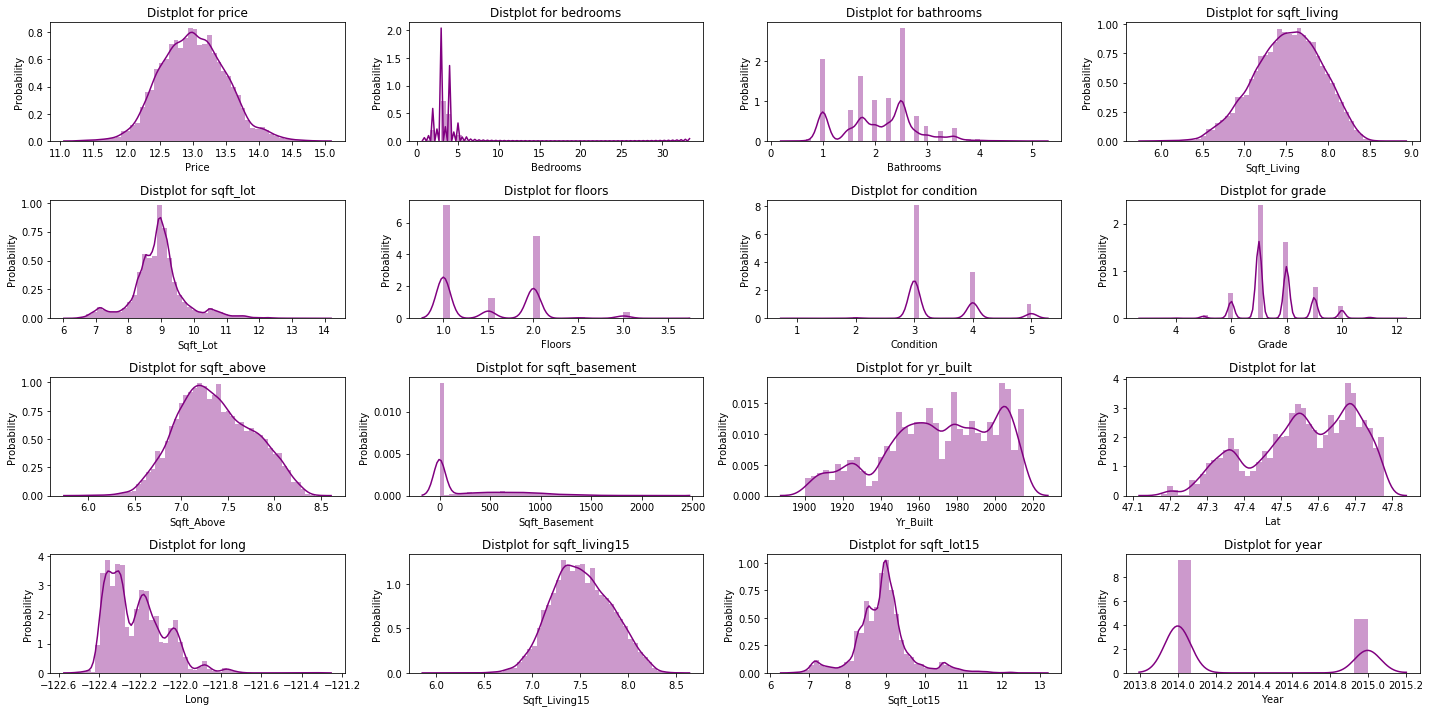

In [17]:
# Here we drop the id column as it will not be used in our model
dfNumeric = dfPreprocessed.select_dtypes(['int64','float64']).drop(labels = 'id', axis = 1).copy()

# We have identified the columns that will benefit from log transformation under the hood. Running this code block
# without the transformation will show as much. 
locColumns = ['price', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_lot15']
dfNumeric[locColumns] = dfNumeric[locColumns].applymap(lambda x: np.log(x))

# we now plot the distribution for each column and display a dataframe with the pvalues from a rigorous normal test
plt.figure(figsize=(20,10))
plotNum = 1
pvalueDict = {}
for x in dfNumeric.columns:
    try:
        axes = plt.subplot(4, 4, plotNum)
        sns.distplot(a = dfNumeric[x], ax = axes, norm_hist = True, color = 'purple')
        plotNum += 1
        plt.title(f'Distplot for {x}')
        plt.xlabel(f'{x.title()}')
        plt.ylabel(f'Probability')
        pvalueDict[x] = stats.normaltest(dfNumeric[x])[1]
#         display(f'Column {x} has the following statistics: {stats.normaltest(dfNumeric[x])}')
    except:
        print(f'''
                  Column, {x}, did not yield a visual because
                  the vast majority of the entries are 0.
                  The seaborn.distplot method of plotting is
                  protected against outliers and hense does not 
                  detect out the non-zero data. However, for the
                  remainder of the analysis we want to keep this info,
                  thus we skip the visual but note that analysis
                  will contine without error
              ''')
        
# create the pvalues df from the various normal test preformed
dfTemp = pd.DataFrame(pvalueDict.values(), index = pvalueDict.keys())
dfTemp.columns = ['P-Values for Normality Test']
display(dfTemp)
plt.tight_layout()

Alas, according to a rigorous test for normality, all numerical columns fail. While normal data would be beneficial, what we really need are for residuals to be normal. Note: For the baseline model we will not be preforming log transforms.

#### Normality Of Residuals
This will be explored after the model has been created.

#### Heteroskewdacity
This will be explored after the model has been created. 

## Standardizing Numerical Data

In order for all our independent variable to be clearly represented in the analysis they must be normalized. For the model we will use z-score standardization. Note that we can only standardize out numerical data.

In [18]:
dfNumericLog = dfNumeric.copy()

In [19]:
for x in dfNumeric.columns:
    mean = dfNumeric[x].mean()
    std = dfNumeric[x].std()
    dfNumeric[x] = dfNumeric[x].apply(lambda x: (x - mean)/std)
dfNumeric.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year
count,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04
mean,9.002656e-14,-3.330187e-16,7.598014e-15,1.624557e-13,-3.341211e-14,-7.057584e-15,-8.794394e-15,-9.472674e-16,2.607855e-13,4.905585e-15,-2.985129e-15,-1.536750e-13,-3.392300e-12,2.689308e-13,-6.974137e-14,-1.208524e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.596560e+00,-2.600924e+00,-2.217741e+00,-4.043094e+00,-3.295828e+00,-8.941447e-01,-3.705134e+00,-4.339547e+00,-3.611888e+00,-6.599148e-01,-2.395142e+00,-2.763842e+00,-2.134712e+00,-4.920360e+00,-3.324398e+00,-6.925953e-01
25%,-7.077234e-01,-3.753214e-01,-7.978794e-01,-6.763676e-01,-5.006207e-01,-8.941447e-01,-6.364611e-01,-5.366198e-01,-7.266361e-01,-6.599148e-01,-6.596617e-01,-6.507196e-01,-8.160568e-01,-7.265471e-01,-5.188851e-01,-6.925953e-01
50%,-2.288711e-02,-3.753214e-01,2.670166e-01,3.417294e-02,-1.362717e-03,-8.941447e-01,-6.364611e-01,-5.366198e-01,-8.042526e-02,-6.599148e-01,8.897687e-02,8.102265e-02,-1.459208e-01,-5.741691e-02,2.957705e-02,-6.925953e-01
75%,6.743136e-01,7.374802e-01,6.219819e-01,7.344737e-01,3.798573e-01,9.639359e-01,8.978754e-01,4.141120e-01,7.309623e-01,6.340080e-01,8.716444e-01,8.566983e-01,6.323017e-01,7.130738e-01,3.955041e-01,1.443775e+00
max,3.852722e+00,3.300872e+01,4.171635e+00,3.130416e+00,6.231079e+00,3.751057e+00,2.432212e+00,4.217039e+00,2.663504e+00,4.955222e+00,1.518196e+00,1.566114e+00,6.504999e+00,3.178050e+00,5.600648e+00,1.443775e+00


## Encoding Categorical Data

Moving on, we need to encode our categorical data. The approach we will be using in one-hot encoding.

In [20]:
dfcatCols = dfPreprocessed.select_dtypes('category').copy()
encodedCatCols = pd.get_dummies(dfcatCols, drop_first = True)

## The Final Dateframe

In [21]:
#combine the numerical data and one-hot encoded data for the final dataframe. 
dfFinal = pd.concat([dfNumeric,encodedCatCols], axis = 1)
dfFinal.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,year,waterfront_1.0,waterfront_Null,yr_renovated_1934.0,yr_renovated_1940.0,yr_renovated_1944.0,yr_renovated_1945.0,yr_renovated_1946.0,yr_renovated_1948.0,yr_renovated_1950.0,yr_renovated_1951.0,yr_renovated_1953.0,yr_renovated_1954.0,yr_renovated_1955.0,yr_renovated_1956.0,yr_renovated_1957.0,yr_renovated_1958.0,yr_renovated_1959.0,yr_renovated_1960.0,yr_renovated_1962.0,yr_renovated_1963.0,yr_renovated_1964.0,yr_renovated_1965.0,yr_renovated_1967.0,yr_renovated_1968.0,yr_renovated_1969.0,yr_renovated_1970.0,yr_renovated_1971.0,yr_renovated_1972.0,yr_renovated_1973.0,yr_renovated_1974.0,yr_renovated_1975.0,yr_renovated_1976.0,yr_renovated_1977.0,yr_renovated_1978.0,yr_renovated_1979.0,yr_renovated_1980.0,yr_renovated_1981.0,yr_renovated_1982.0,yr_renovated_1983.0,yr_renovated_1984.0,yr_renovated_1985.0,yr_renovated_1986.0,yr_renovated_1987.0,yr_renovated_1988.0,yr_renovated_1989.0,yr_renovated_1990.0,yr_renovated_1991.0,yr_renovated_1992.0,yr_renovated_1993.0,yr_renovated_1994.0,yr_renovated_1995.0,yr_renovated_1996.0,yr_renovated_1997.0,yr_renovated_1998.0,yr_renovated_1999.0,yr_renovated_2000.0,yr_renovated_2001.0,yr_renovated_2002.0,yr_renovated_2003.0,yr_renovated_2004.0,yr_renovated_2005.0,yr_renovated_2006.0,yr_renovated_2007.0,yr_renovated_2008.0,yr_renovated_2009.0,yr_renovated_2010.0,yr_renovated_2011.0,yr_renovated_2012.0,yr_renovated_2013.0,yr_renovated_2014.0,yr_renovated_2015.0,yr_renovated_Null,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,2.071300e+04,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.00000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713.000000,20713

## Treating Multi-Coolinearity

With our final representation of both numerical and categorical columns.  we now will go through the process of removing coolinear columns. For the purposese of this investigation we will use a correlation value of .75 as the threshold of what columns we should remove for being coolinear. 

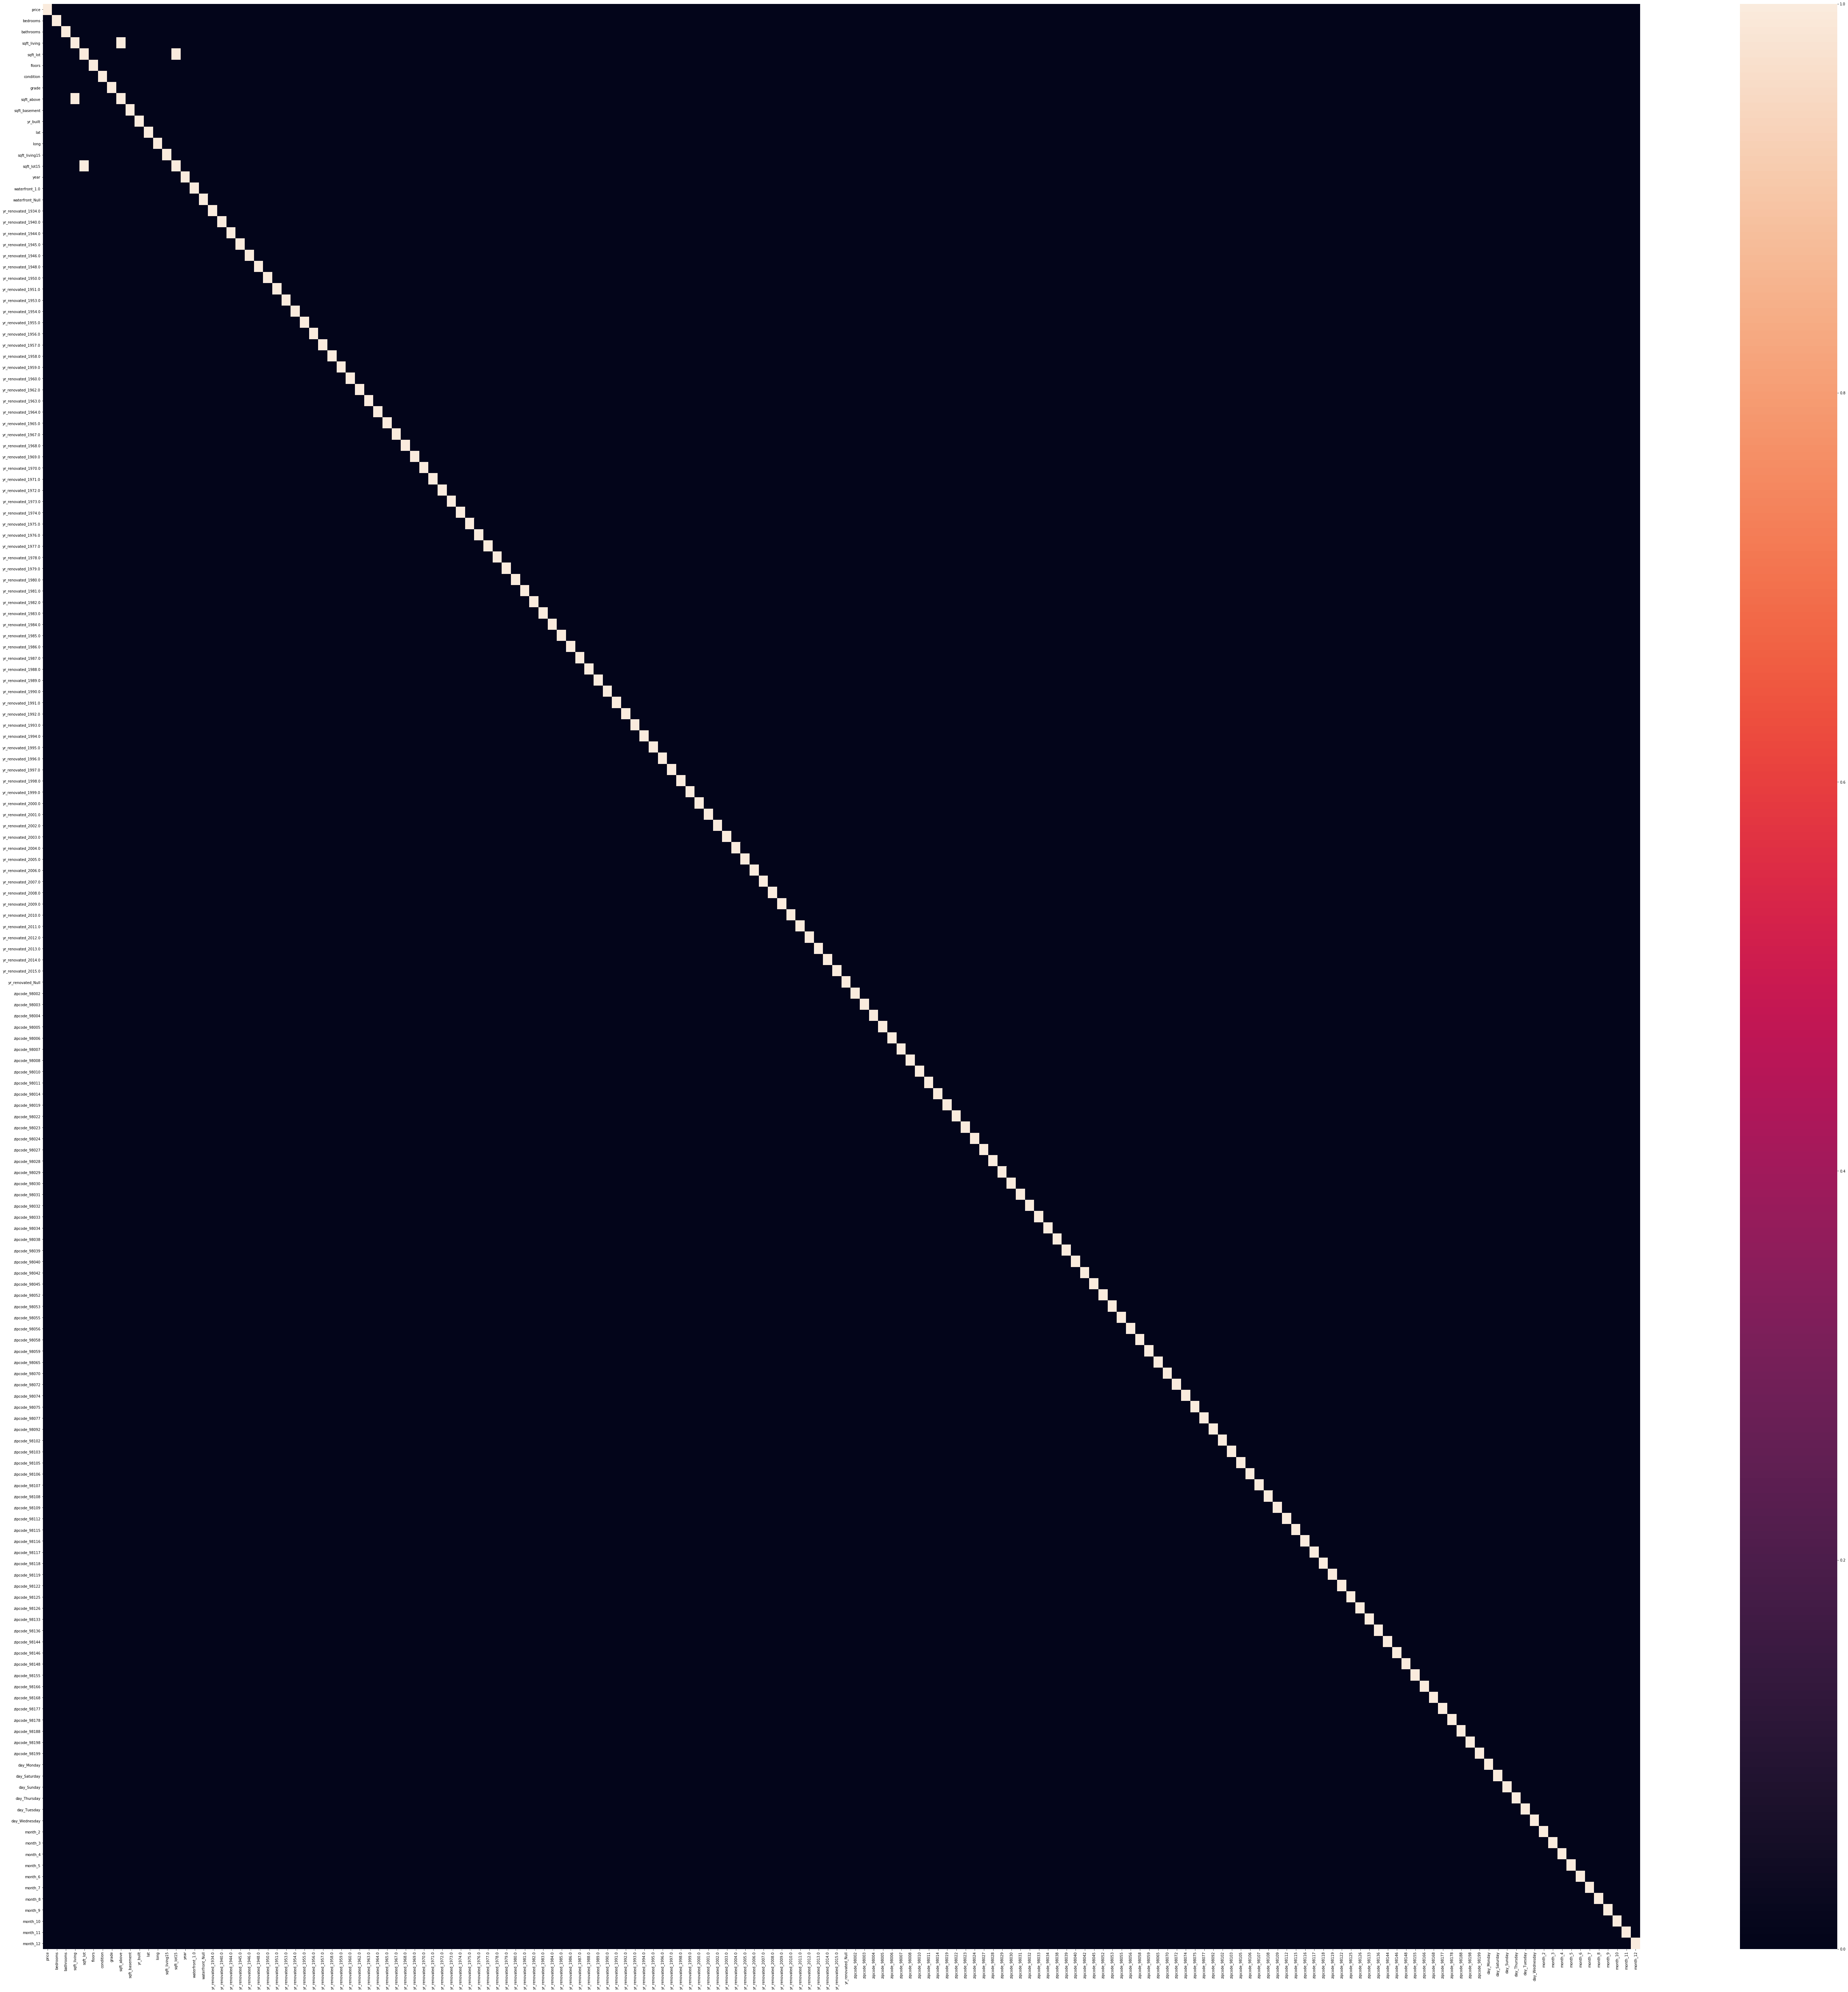

In [22]:
# Create a true false table based on the dfFinal correlation matrix output
colinearCorrelations = np.abs(dfFinal.corr())>.75

# Instantiate a figure and create a heatmap of the correlations matrix
plt.figure(figsize=(100,100))
sns.heatmap(colinearCorrelations.iloc[:, 0:]);

This representaion isn't remotely useful for presentation but it does show that we are only concerned with the columns in top left corner. 

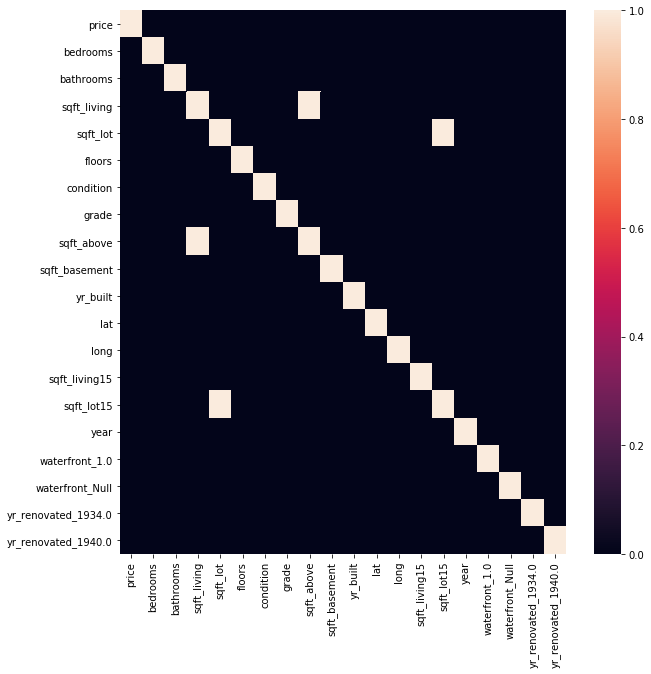

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(colinearCorrelations.iloc[:20, :20])

We're detected a co-linear relationship between the following pairs:
* sqft_lot15 : sqft_lot
* sqft_living : sqft_above

we will drop one column from each pair to reduce the incluence of nulti-colinearity on our model.

In [24]:
dfFinal.drop(labels = ['sqft_above', 'sqft_lot15'], axis = 1, inplace = True)

## Creating The Model

With all the data preped we move forward with creating out baseline model.

In [25]:
# The following code creates a linear model using ordinary least squares. for more info see statsmodels.OLS
Y = dfFinal['price']
X = dfFinal.drop(labels = ['price'], axis = 1)
X = sm.add_constant(X)
model = sm.OLS(endog = Y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     772.8
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:20:41   Log-Likelihood:                -8615.1
No. Observations:               20713   AIC:                         1.757e+04
Df Residuals:                   20541   BIC:                         1.894e+04
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9870      0.047    -21.088      0.000      -1.079      -0.895
bedrooms               -0.0267      0.003     -7.853      0.000      -0.033      -0.020
bathrooms               0.0619      0.005     13.585      0.000       0.053       0.071
sqft_living             0.3388      0.006     54.286      0.000       0.327       0.351
sqft_lot                0.1003      0.004     25.337      0.000       0.093       0.108
floors                 -0.0072      0.004     -1.719      0.086      -0.015       0.001
condition               0.0746      0.003     25.357      0.000       0.069       0.080
grade                   0.2085      0.005     46.037      0.000       0.200       0.217
sqft_basement          -0.0489      0.004    -13.269      0.000      -0.056      -0.042
yr_built               -0.0276      0.005     -6.044      0.000      -0.037      -0.019
lat                     0.1304      0.021      6.194      0.000       0.089       0.172
long                   -0.1315      0.015     -8.603      0.000      -0.161      -0.102
sqft_living15           0.1220      0.004     28.167      0.000       0.114       0.131
year                    0.1017      0.008     12.421      0.000       0.086       0.118
waterfront_1.0          1.3197      0.039     33.670      0.000       1.243       1.397
waterfront_Null         0.0023      0.008      0.281      0.778      -0.014       0.018
yr_renovated_1934.0     0.5338      0.369      1.445      0.148      -0.190       1.258
yr_renovated_1940.0    -0.2517      0.261     -0.965      0.335      -0.763       0.260
yr_renovated_1944.0    -0.0382      0.369     -0.103      0.918      -0.762       0.686
yr_renovated_1945.0     0.0557      0.213      0.261      0.794      -0.363       0.474
yr_renovated_1946.0     0.4430      0.369      1.201      0.230      -0.280       1.166
yr_renovated_1948.0     0.0690      0.369      0.187      0.852      -0.655       0.793
yr_renovated_1950.0    -0.5081      0.370     -1.375      0.169      -1.233       0.216
yr_renovated_1951.0     0.1122      0.369      0.304      0.761      -0.612       0.836
yr_renovated_1953.0    -0.5329      0.369     -1.443      0.149      -1.257       0.191
yr_renovated_1954.0     1.2020      0.369      3.256      0.001       0.479       1.926
yr_renovated_1955.0     0.2334      0.213      1.095      0.274      -0.184       0.651
yr_renovated_1956.0    -0.2113      0.215     -0.985      0.325      -0.632       0.209
yr_renovated_1957.0    -0.0688      0.261     -0.263      0.792      -0.581       0.443
yr_renovated_1958.0     0.2209      0.213      1.035      0.301      -0.197       0.639
yr_renovated_1959.0    -0.4554      0.369     -1.235      0.217      -1.178       0.267
yr_renovated_1960.0    -0.7749      0.213     -3.630      0.000      -1.193      -0.356
yr_

### we will now preform a QQ-plot and heterskewdacity test


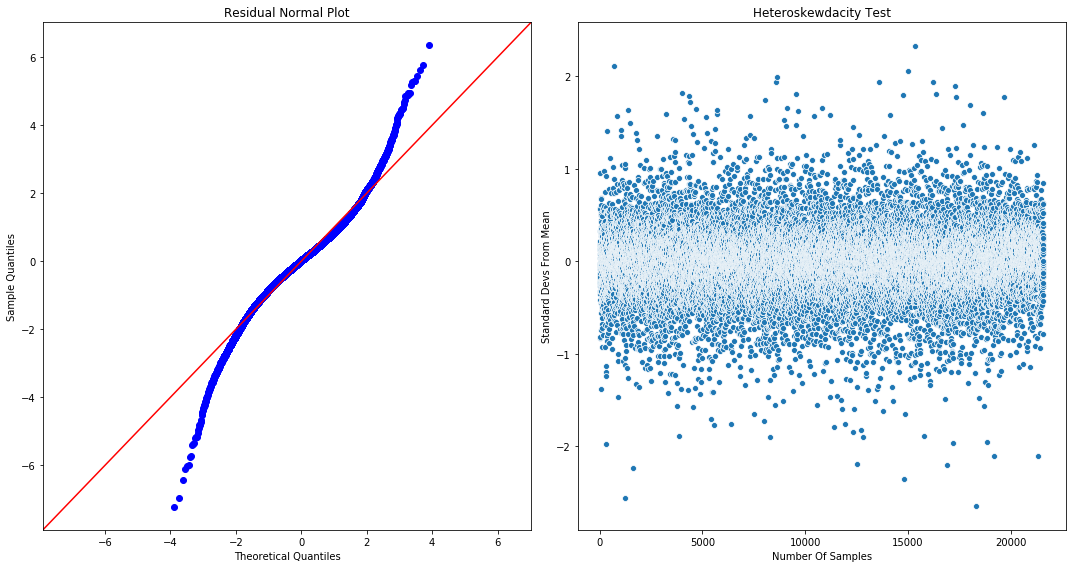

In [26]:
# get the residual data from the model object
residuals = model.resid

# Instantiate a figure and axes objects
plt.figure(figsize=(15,8))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)

#Cretae the plots
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax = axes1)
sns.scatterplot(data = residuals, ax = axes2)

# Customize the figure
axes1.set_title("Residual Normal Plot")
axes2.set_title("Heteroskewdacity Test")
axes2.set_xlabel('Number Of Samples')
axes2.set_ylabel('Standard Devs From Mean')

#plotting options
plt.tight_layout()
plt.show()

## Base Model Conclusions

As far as base models go, this was a great first attempt. With an adjusted R-squared value of 0.871 it appears we've been able to capture most of the King County Housing data set's variation.

A note the QQ-plot and heteroskewdacity test. The residuals are clearly homoskewdastic as shown in the plot on the right, thus satisfying that portion of our modeling assumptions. The QQ-plot is less clear just from the graph. Reading the plot on the left we can conclude that the residuals are too steep for a standard normal distribution. This means that more of the residuals lie in the center of the distribution (or the tails are thinner) than would be expected in a standard normal. In a sense, the residuals are displaying less varience than a typical normal. With this finding, we can feel confident about the model's conclusions because the residuals are more centrally clustered than a typical normal, meaning our confidence in each of the predicted coefficients should be higher than that predicted by our model.

# Improving The Baseline Model

Taking a close look at our baseline there are several points to pay attention to. In general it seems as though our approach of leaving all available information in the model has paid off rather significantly, no pun intended. Yet, there are still a number of the independant variables or features of the model that have failed to meet our p-value threshold. We will now go through and eliminate these features.

## Feature Analysis

Our selection process has brought us this far. The following function is taken from the customModule in this repo. It will loop through all the features in the model and remove the ones which don't meet the p-value standard we set (.05 in this case). After removing the insignificant p-values, the function reruns the model and once again checks whether or not the new list of features passes the p-value threshold. This will continue until all the remaining features pass the test.

In [27]:
# for more info on reduceModel, see the docstring or source code in this repo
finalModel, excludedCols = customModule.reduceModel(dfFinal, 
                                                    features = [x for x in dfFinal.drop(columns = 'price').columns], 
                                                    target = 'price', 
                                                    pThreshold = .05)

 The starting R-value for the model is 0.8654706226625756


The following columns have p-values above the threshold of 0.05: ['floors', 'waterfront_Null', 'yr_renovated_1934.0', 'yr_renovated_1940.0', 'yr_renovated_1944.0', 'yr_renovated_1945.0', 'yr_renovated_1946.0', 'yr_renovated_1948.0', 'yr_renovated_1950.0', 'yr_renovated_1951.0', 'yr_renovated_1953.0', 'yr_renovated_1955.0', 'yr_renovated_1956.0', 'yr_renovated_1957.0', 'yr_renovated_1958.0', 'yr_renovated_1959.0', 'yr_renovated_1962.0', 'yr_renovated_1964.0', 'yr_renovated_1965.0', 'yr_renovated_1967.0', 'yr_renovated_1968.0', 'yr_renovated_1969.0', 'yr_renovated_1971.0', 'yr_renovated_1972.0', 'yr_renovated_1973.0', 'yr_renovated_1974.0', 'yr_renovated_1975.0', 'yr_renovated_1977.0', 'yr_renovated_1978.0', 'yr_renovated_1979.0', 'yr_renovated_1980.0', 'yr_renovated_1981.0', 'yr_renovated_1982.0', 'yr_renovated_1983.0', 'yr_renovated_1984.0', 'yr_renovated_1986.0', 'yr_renovated_1987.0', 'yr_renovated_1989.0', 'yr_renovated_199

## Improved Model Summary

In [28]:
finalModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:20:42   Log-Likelihood:                -8645.9
No. Observations:               20713   AIC:                         1.752e+04
Df Residuals:                   20597   BIC:                         1.844e+04
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9845      0.031    -31.698      0.000      -1.045      -0.924
bedrooms               -0.0269      0.003     -7.939      0.000      -0.034      -0.020
bathrooms               0.0612      0.004     13.742      0.000       0.052       0.070
sqft_living             0.3365      0.006     56.094      0.000       0.325       0.348
sqft_lot                0.1014      0.004     26.825      0.000       0.094       0.109
condition               0.0747      0.003     25.569      0.000       0.069       0.080
grade                   0.2082      0.005     46.131      0.000       0.199       0.217
sqft_basement          -0.0460      0.003    -14.404      0.000      -0.052      -0.040
yr_built               -0.0312      0.004     -7.137      0.000      -0.040      -0.023
lat                     0.1251      0.015      8.471      0.000       0.096       0.154
long                   -0.1243      0.015     -8.530      0.000      -0.153      -0.096
sqft_living15           0.1220      0.004     28.279      0.000       0.114       0.131
year                    0.1015      0.008     12.416      0.000       0.086       0.118
waterfront_1.0          1.3280      0.039     34.277      0.000       1.252       1.404
yr_renovated_1954.0     1.1935      0.369      3.233      0.001       0.470       1.917
yr_renovated_1960.0    -0.7724      0.213     -3.619      0.000      -1.191      -0.354
yr_renovated_1963.0    -0.5880      0.185     -3.179      0.001      -0.950      -0.225
yr_renovated_1970.0    -0.2921      0.123     -2.371      0.018      -0.534      -0.051
yr_renovated_1976.0    -0.9477      0.369     -2.569      0.010      -1.671      -0.225
yr_renovated_1985.0    -0.2185      0.107     -2.048      0.041      -0.428      -0.009
yr_renovated_1988.0     0.2743      0.112      2.458      0.014       0.056       0.493
yr_renovated_1991.0     0.2297      0.096      2.397      0.017       0.042       0.418
yr_renovated_1993.0     0.2478      0.111      2.223      0.026       0.029       0.466
yr_renovated_1994.0     0.3664      0.099      3.706      0.000       0.173       0.560
yr_renovated_1998.0     0.2146      0.099      2.169      0.030       0.021       0.409
yr_renovated_1999.0     0.4722      0.107      4.421      0.000       0.263       0.682
yr_renovated_2001.0     0.2450      0.099      2.479      0.013       0.051       0.439
yr_renovated_2002.0     0.3249      0.099      3.283      0.001       0.131       0.519
yr_renovated_2003.0     0.2002      0.071      2.805      0.005       0.060       0.340
yr_renovated_2004.0     0.2916      0.081      3.609      0.000       0.133       0.450
yr_renovated_2005.0     0.1859      0.070      2.651      0.008       0.048       0.323
yr_renovated_2006.0     0.2209      0.087      2.530      0.011       0.050       0.392
yr_

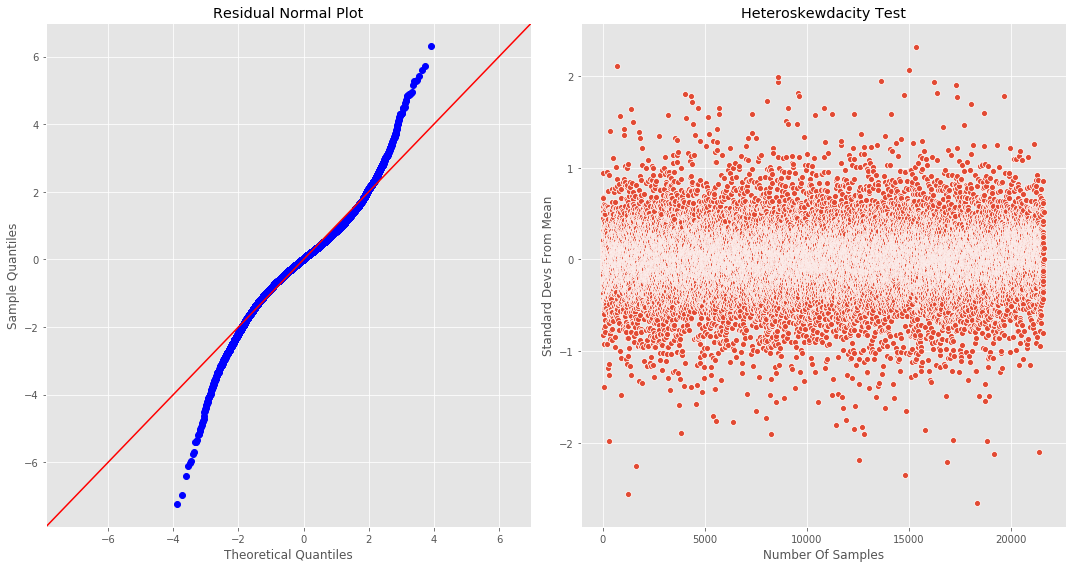

In [29]:
residuals = finalModel.resid
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax = axes1)
axes1.set_title("Residual Normal Plot")
sns.scatterplot(data = residuals, ax = axes2)
axes2.set_title("Heteroskewdacity Test")
axes2.set_xlabel('Number Of Samples')
axes2.set_ylabel('Standard Devs From Mean')
plt.tight_layout()
plt.show()

Looking at our QQ plot we see that the residuals are sufficiently normal and most definately homoskewdastic. We can move forward with answering your original question with confidence in our model's conclusions. 

If you would like to see all the columns that were removed by the reduceModel funtion then uncomment the following cell

In [30]:
# excludedCols.sort()
# display(excludedCols)

## Un-Translating Feature Coefficients

Because our data has been transformed and standardized, the coefficients give the scale of the impact of each of the significant features. While this is useful information, it is also important to understand what the model offers as the dollar amount impact of any given feature. 

In [58]:
# We will re-execute the dfPreprocessed dataframe and original transformations
logColumns = ['price', 'sqft_living', 'sqft_living15', 'sqft_above', 'sqft_lot', 'sqft_lot15']
dfNumericLog.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

In [63]:
# The following function will undo the standardization and put the features with their predicted dollar amount of impact
# into a dataframe. 
def untransform(params):
    '''
        This function undoes the z-score transformation. It is highly tailored
        to this specific data set and will not export without refactoring. 
        
        Params:
        
            parmas - A pd.Series of parameter coefficients that are the output of a linear regression model
            
        Returns:
            
            coeffDf - A pd.DataFrame object that is indexed by the columns of dfNumeric and has values that
                      are the un-transformed z-score values from the param parameter. 
    '''
    # Instantiate an empty dictionary
    description = {}
    
    # Create a loop of that undoes the z-score transformation
    for x in params.index:
        if x in dfNumericLog.columns:
            print(x)
            alpha = params[x]
            meanX = dfNumericLog[x].mean()
            meanY = dfNumericLog['price'].mean()
            sigmaX = dfNumericLog[x].std()
            sigmaY = dfNumericLog['price'].std()
            nonLogColumns = []
            if x in logColumns:
                pass
            else:
                nonLogColumns.append(x)
                
            #This if statement covers the columns that have been log transformed
            if x in logColumns:
                description[x] = math.floor(np.e**(((-1*alpha*meanX*sigmaY)/(sigmaX))+meanY))            
            elif x in nonLogColumns:
                description[x] = math.floor(np.e**((alpha*(1 - meanX)*sigmaY)/(sigmaX))*np.e**(meanY))
            # The remainder of the columns are not log transformed
        else:
            alpha = params[x]
            meanY = dfNumericLog['price'].mean()
            sigmaY = dfNumericLog['price'].std()
            description[x] = math.floor(np.e**((alpha*sigmaY)+meanY))
    
    # Creates the dataframe for the return
    coeffDf = pd.DataFrame.from_dict(description, orient = 'index') 
    coeffDf.columns = ['Parameter Coefficients']
    return coeffDf

In [64]:
# Change the max rows display option for this cell only
pd.set_option('display.max_rows', None)

# Run the function from the previous cell
conclusions = untransform(finalModel.params)
display(conclusions)

# Reset the rows display option to 30
pd.set_option('display.max_rows', 30)

bedrooms
bathrooms
sqft_living
sqft_lot
condition
grade
sqft_basement
yr_built
lat
long
sqft_living15
year


,Parameter Coefficients
const,277153
bedrooms,462387
bathrooms,427364
sqft_living,20322
sqft_lot,259910
condition,390766
grade,237844
sqft_basement,453546
yr_built,1233924
lat,0


## Cross Validating The Model
As a final exercise to test the validity of our model, we will preform a 20 fold cross validation in order to test our models ability to predict the data in each fold, given that it's been trained on the remainder. 

In [34]:
# Because scikit-learn has way better cross-validation build ins we use theirs

# Use the linearRegression class to preform the regression all features determined to be significant. 
linreg = LinearRegression()
cv_20_results = cross_val_score(linreg, dfFinal[conclusions.index[1:]], dfFinal['price'], cv=20, scoring='r2')
display(cv_20_results)
print(f'The median of the cross validation was {np.median(cv_20_results)}')

array([-1.44970276e+21,  5.41977248e-01,  5.91862038e-01,  5.76008068e-01,
        5.65130117e-01,  5.41166552e-01, -1.76291680e+20,  5.47234376e-01,
        5.75518786e-01,  5.79792909e-01,  5.74586081e-01,  5.54966875e-01,
        5.70163960e-01,  5.84069517e-01,  5.87759203e-01,  5.80211208e-01,
        5.52165401e-01,  5.91499566e-01,  3.71000445e-01,  3.03052817e-01])

The median of the cross validation was 0.5676470386646785


Our cross validation has opened up some new material for investigation. On 18 of the folds, the predicted r-squared value is incredibly close of the models r-squared, but in two cases the calculated value is off by an incredible margin. This suggests the model is unstable when training on certain small subsets of the data, an instability that will take more preprocessing of the data to completely tease out. 

# Conclusions

## Overview

In general, every feature that remains in the model should be considered significant (the actual statistics definition) predictors of saleprice. That being said, being statistically significant and being one of the most impactful features is not the same. The following are the ten most influential factors derived by the model

* sqft_living - The total livable area inside the house. 
* view - The number of views prior to being sold. 
* waterfront - Is the location of the house on a waterfront. 
* zipcode - Location, Location, Location
* bedrooms - The number of bedrooms. 
* bathrooms - The number of bathrooms.
* month - The calendar month of the sale
* yr_renovated - The renovation year

All other factors were disregarded as insignificant predictors for sale price



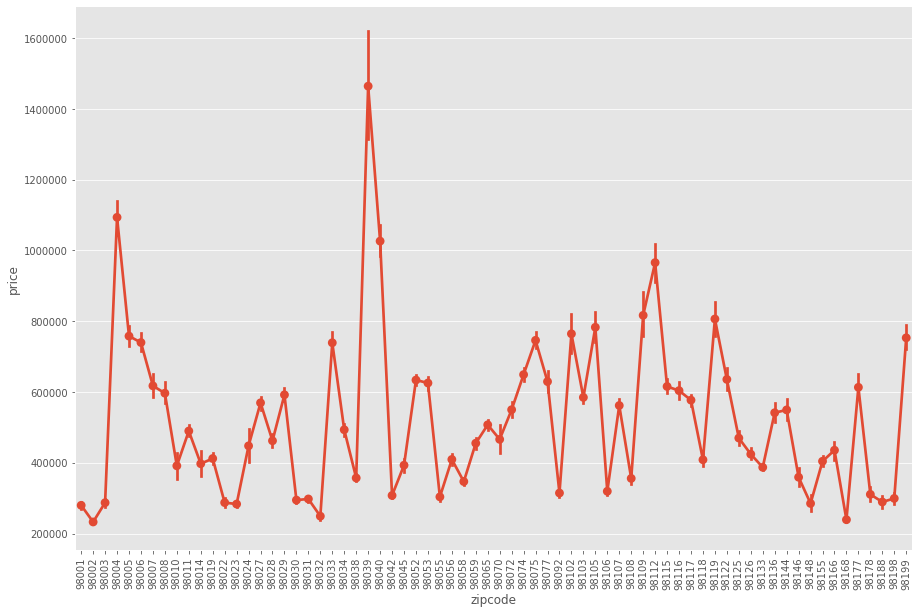

In [35]:
plt.figure(figsize=(15,10))
axes = sns.pointplot(x = 'zipcode' , y = 'price', data = dfPreprocessed)
plt.xticks(rotation = 90);

## Question Answers

###  Question 1: Is it worth it to expand a house?
#### Answer:
It depends on the project! The model has derived a yield of 251 dollars per sqaure foot. In this senario, if you wee to add an additional 300 square feet on to your house you would net approximately 75,000 dollars. Depending on the cost of construction this may or may not give you any return on investment.


###  Question 2: If I have space to add an additional room, what should I put in the space if I want to increase my home value?
#### Answer:
Bathroom without question! According to the model the price increase for adding a new bathroom is 55,793. Because all dependent variables in the model are scaled, we can compare this directly to the 16,029 price increase of adding a bedroom. The bathroom is the better option. 



###  Question 3: I'm looking to buy a house in King County. I like a lot of space and don't really care about the neighborhood. What area should I look in to get the most space for my money if I can only spend 400,000 dollars.
#### Answer:
Look in the one of the following two areas. Zipcode 98032 or 98023.
##### Answer Explanation:
The model hands us the answer. Becuase all entries are standardized, the magitude of the coefficients say which zip codes have the least impact on home price. To demonstrate the effectiveness, below is a plot of all the homes under 400,000 brocken out by zip code. 

Text(0, 0.5, 'Price (US Dollars)')

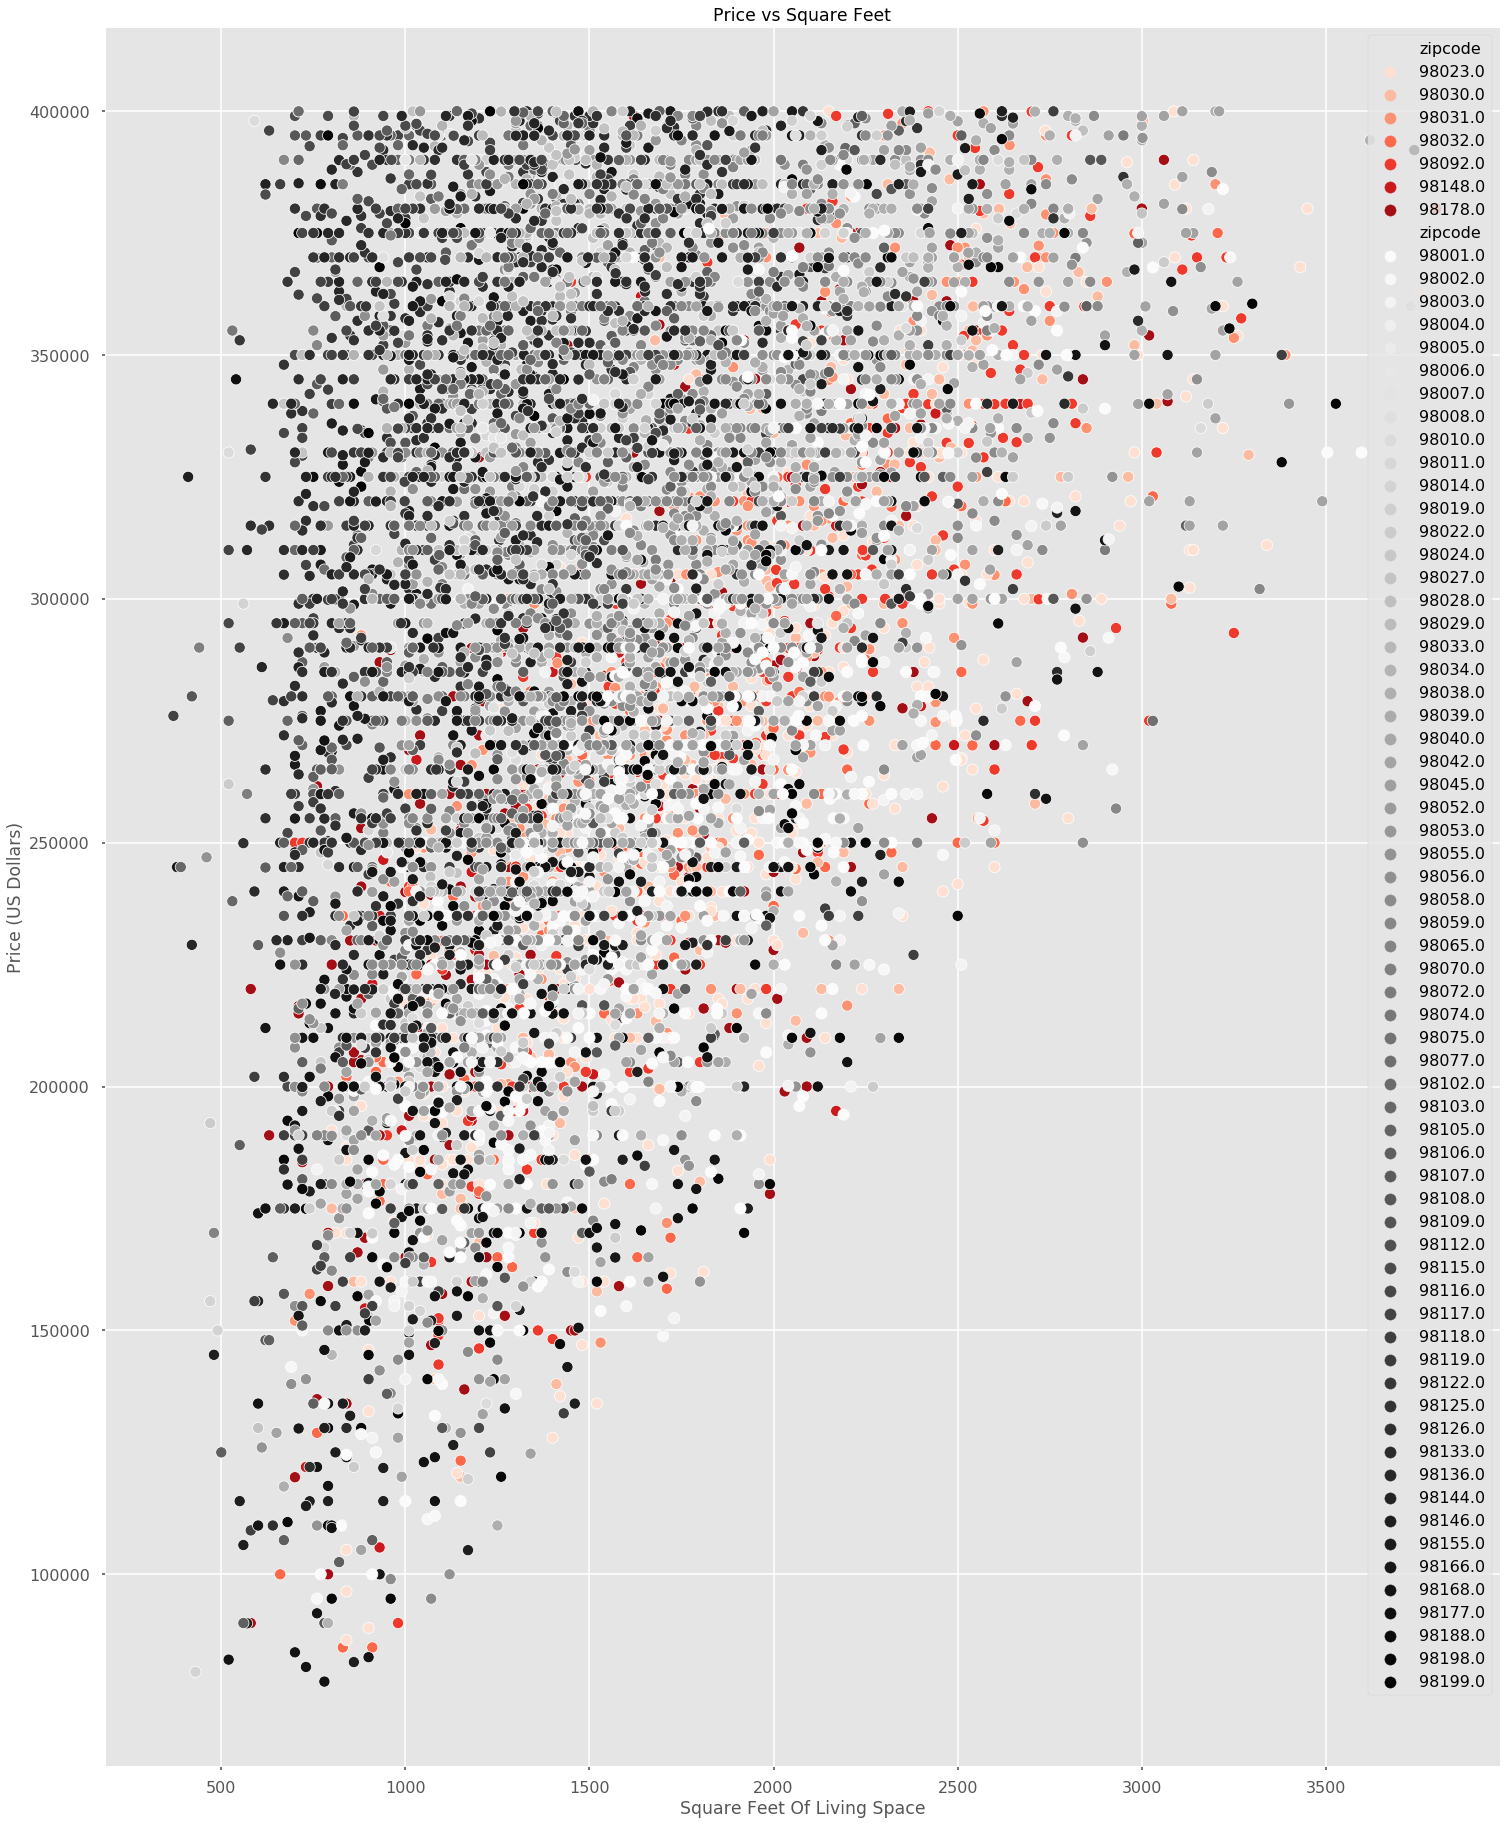

In [36]:
# dfPreprocessed['zipcode'].astype('int64')
plt.figure(figsize=(25,32))
plt.style.use('seaborn-poster')
sns.scatterplot(x = dfPreprocessed['sqft_living'].loc[dfPreprocessed['price'] < 400000],
                y = dfPreprocessed['price'].loc[dfPreprocessed['price'] < 400000],
                hue = dfPreprocessed['zipcode'].loc[(dfPreprocessed['zipcode'] == 98032)| 
                                                    (dfPreprocessed['zipcode'] == 98023) |
                                                    (dfPreprocessed['zipcode'] == 98030) |
                                                    (dfPreprocessed['zipcode'] == 98031) | 
                                                    (dfPreprocessed['zipcode'] == 98092) |
                                                    (dfPreprocessed['zipcode'] == 98148) |
                                                    (dfPreprocessed['zipcode'] == 98178)],
               palette = 'Reds')
sns.scatterplot(x = dfPreprocessed['sqft_living'].loc[dfPreprocessed['price'] < 400000],
                y = dfPreprocessed['price'].loc[dfPreprocessed['price'] < 400000],
                hue = dfPreprocessed['zipcode'].loc[(dfPreprocessed['zipcode'] != 98032) & 
                                                    (dfPreprocessed['zipcode'] != 98023) &
                                                    (dfPreprocessed['zipcode'] != 98030) &
                                                    (dfPreprocessed['zipcode'] != 98031) &
                                                    (dfPreprocessed['zipcode'] != 98092) &
                                                    (dfPreprocessed['zipcode'] != 98148) &
                                                    (dfPreprocessed['zipcode'] != 98178)],
               palette = 'binary')
plt.title('Price vs Square Feet', size = 'xx-large')
plt.xlabel('Square Feet Of Living Space', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'xx-large')

### Question 4: My house is styled from back in the seventies. I'm trying to sell it and want to know if it's worth upgrading before I sell?
#### Answer:
Yes! While not all years were included in the model due to a limited number of data points, for those included that were prior to 1990, the model has indecated that they have a negative impact on sale price. As opposed to all years beyond 1990, in which case they have a positive impact on the sale price. This can be seen visually in the following plot

In [37]:
nullReno = dfPreprocessed.loc[(dfPreprocessed['yr_renovated'] == 'Null') | (dfPreprocessed['yr_renovated'] == 0)]
dfTemp = dfPreprocessed.drop(nullReno.index)
dfTemp['yr_renovated'] = dfTemp['yr_renovated'].astype('int64')
dfTemp['decade'] = dfTemp['yr_renovated'].apply(lambda x: math.floor(x/10))

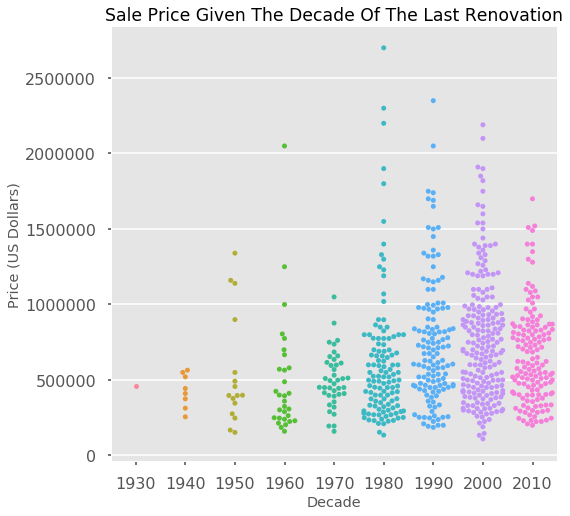

In [38]:
plt.figure(figsize=(8,8))
plt.style.use('ggplot')
g = sns.swarmplot(x = dfTemp['decade'], y = dfPreprocessed['price'])
plt.title('Sale Price Given The Decade Of The Last Renovation', size = 'xx-large')
# plt.xticks([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
plt.xlabel("Decade", size = 'x-large')
plt.ylabel("Price (US Dollars)", size = 'x-large')
g.set_xticklabels([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]);


In the visual, homes renovated more recently sell for much more than those last renovated in the 1970's, thus confirming the model's conclusions. 
### Qestion 5: I'm looking to sell my house but I don't have much money for renovations. My house was built in the 80's and I haven't done much in the way of major renovations. What should I do?
#### Answer:
You should advertise the sale. Advertising to get views for your home prior to sale is highly beneficial.

##### Answer Explanation:
Homes built in the 1980's are penalized in terms of sale price. Because none of the 1980's renovations or build years made the final model this imples that having a house made (and therefore renovated) in the 1980's doesn't have any measurable affect on the sale price. Because your budget is limited, major renovations are out of the question. From the model however, we know that the more views the house has prior to sale has a strong positive affect on the sale price (comperable to modern renovations). 

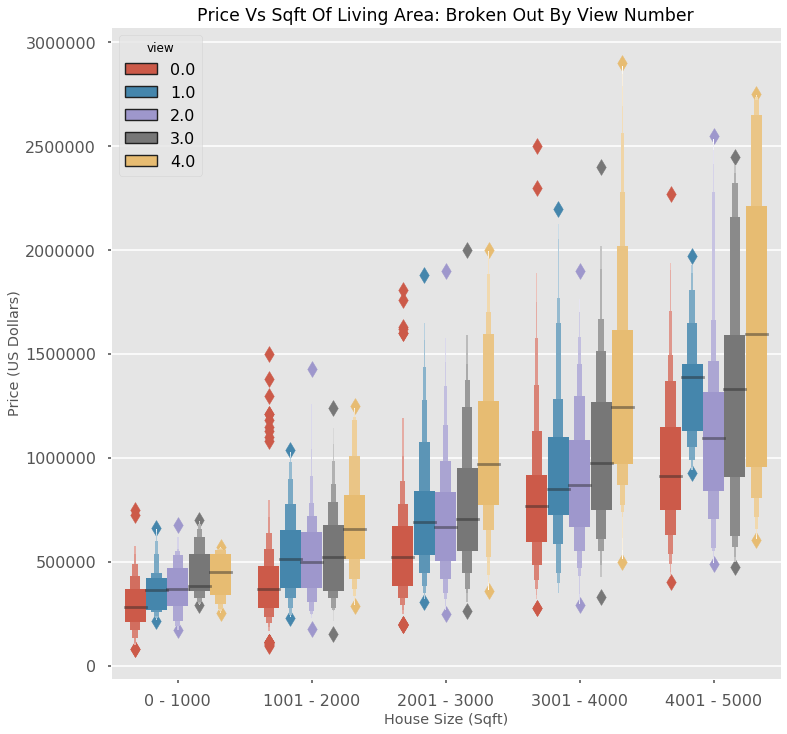

In [39]:
nullView = dfPreprocessed.loc[(dfPreprocessed['view'] == 'Null')]
dfTemp = dfPreprocessed.copy().drop(nullView.index)
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))
plt.figure(figsize=(12,12))
axes = sns.boxenplot(x ='sqft_living_1000',y ='price',hue = 'view', data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5]);
plt.title('Price Vs Sqft Of Living Area: Broken Out By View Number', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
axes.set_xticklabels(['0 - 1000', '1001 - 2000', '2001 - 3000', '3001 - 4000', '4001 - 5000']);

While there is significant overlap, the general trend show by the visual confirms that increased number of views has a positive outcome on sale price. Because of this advertising should be a priority as a relatively low cost solution that will have a boost on your home price.
# Appendix

## Breakdown

### const - Baseline Price

As a gut check on the model we can use the const parameter to calculate the untransformed baseline price our model predicts. This is the predicted value of a home if we don't feed in any information describing the homes features. <strong>Our model produces a value of 364,978 dollars for the baseline.</strong>

### sqft_living - Total Living Area Square Feet

Both sqft_living and sale price underwent a logirithmic transform before being fed into the final model. The coefficient for sqft living was concluded to be .5576. Using this coefficient we can untransform our data to yield <strong>a rate of 251 dollor price increase per square foot</strong> from the baseline. 

### bedrooms - Number Of Bedrooms

The model has predicted 16029 per bedroom. 

### bathrooms - Number Of Bathrooms

The model has predicted a value of 55793 dollars per bathroom 

### floors - The Number of Floors In The House

The model has predicted a value of 102237 dollars per floor of the house. 

### waterfront_1.0 - Waterfront Property

This variable was categorical and thus is a binary choice of, 'the property is waterfront' and the 'property is not waterfront'. Because of this, the model assigns a value that describes what being a waterfront property does to the overal value of the home. Untransforming the data, <strong>having a waterfront property increases the homes value by 693,182</strong> dollars from the baseline

### view - Public Interest

Also categorical, the view variable reports the number of times a property has been viewed. Our model suggests that properties that are viewed have a <strong>price increase of 514,245 - 635,698 dollars from the baseline.</strong> 

### Various Zipcodes

The final categorical variable was the zipcode in which the home resides. There are several different zipcodes that made the final model which ultimately means that location is highly significant in influencing home price. This is despite the limitation that any home can only be in 1 zip code category at a time. There is a table in the appendix which shows the complete breakdown of of the zipcodes included in the model. 

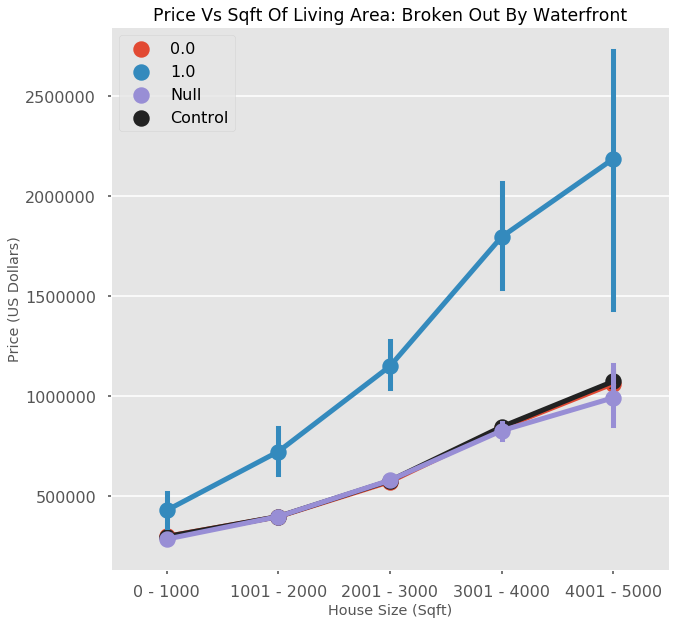

In [40]:
dfTemp = dfPreprocessed.copy()
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))
dfTemp['control'] = ['Control' for x in range(dfTemp.shape[0])]
plt.figure(figsize=(10,10))
axes = sns.pointplot(x ='sqft_living_1000',
                     y ='price',hue = 'waterfront', 
                     data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5]);
axes1 = sns.pointplot(x ='sqft_living_1000',
                      y ='price',hue ='control',  
                      data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5], 
                      color = 'black');

plt.title('Price Vs Sqft Of Living Area: Broken Out By Waterfront', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
plt.legend()
axes.set_xticklabels(['0 - 1000', '1001 - 2000', '2001 - 3000', '3001 - 4000', '4001 - 5000']);

KeyboardInterrupt: 

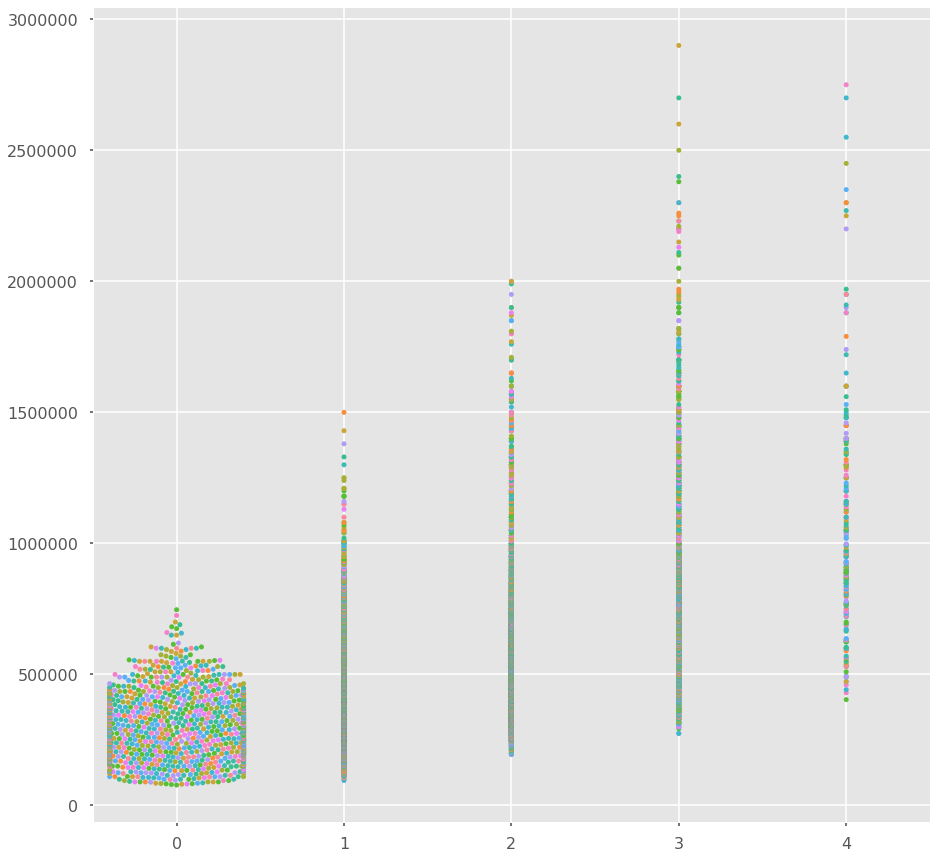

In [41]:
dfTemp = dfPreprocessed.copy()
dfTemp['sqft_living_1000'] = dfTemp['sqft_living'].apply(lambda x: math.floor(x/1000))
dfTemp['control'] = ['Control' for x in range(dfTemp.shape[0])]
plt.figure(figsize=(15,15))
axes = sns.swarmplot(x ='sqft_living_1000',
                     y ='price',hue = 'month', 
                     data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5]);
axes1 = sns.pointplot(x ='sqft_living_1000',
                      y ='price',hue ='control',  
                      data = dfTemp.loc[dfTemp['sqft_living_1000'] < 5], 
                      color = 'black');

plt.title('Price Vs Sqft Of Living Area: Broken Out By Waterfront', size = 'xx-large')
plt.ylabel('Price (US Dollars)', size = 'x-large')
plt.xlabel('House Size (Sqft)', size = 'x-large')
plt.legend()
axes.set_xticklabels(['0 - 1000', '1001 - 2000', '2001 - 3000', '3001 - 4000', '4001 - 5000']);

In [ ]:
correlations = np.abs(dfFinal.corr())>.75

## Treatment Of Outliers

Outliers have a disproportionate ability to affect models and are typically discarded prior to final analysis. I agrue that in terms of sale price, exceptionally low/high valued housed should not be considered outliers in the classical sense. An outlier by definition is a data point that represents an extraordinary break from the distribution of the caused by randomness. They are regarded as quantities that are hard or impossible to predict given a model that would predict the more standard data of a given set. For housing, such disregard for a home of extradinary value isn't in line with the true nature of an outlier because these values can be predicted when considering a proper subset of the original data set. Therefore, our first decision in compiling a refined version of the baseline is to spilt the data sets into three categories. Low sale price, middle sale price and high sale price. This is a tactical decision that is supported by our baseline modle residuals. The QQ plot above showcases piecewise linear residuals. Thus a linear regression should inherantly work, if we can find valid threshholds to seperate the data. To do this we return to the baseline model and find the values at which the slope of our residuals changes substantially. 

In [ ]:
outliers = residuals.loc[(residuals < residuals.quantile(.0035)) | (residuals > residuals.quantile(.9965))]


In [ ]:
stats.ttest_ind(residuals, outliers, equal_var = False)

In [ ]:
sm.graphics.qqplot(outliers, dist=stats.norm, line='45', fit=True, ); #git rid of p-hacking